<a href="https://colab.research.google.com/github/aabdulhakeem/MINIST_dif_models_study/blob/SIMPLE-ANN-MODEL-AND-SVM/MINIST_with_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##0. Importing MINIST with shuffled data

In [4]:
X, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X.shape

(70000, 784)

In [5]:
X = X.reshape(-1, 28, 28)
X.shape

(70000, 28, 28)

In [6]:
X_images, y = sklearn.utils.shuffle(X, y,random_state=42)
X = X_images.reshape(-1, 784)

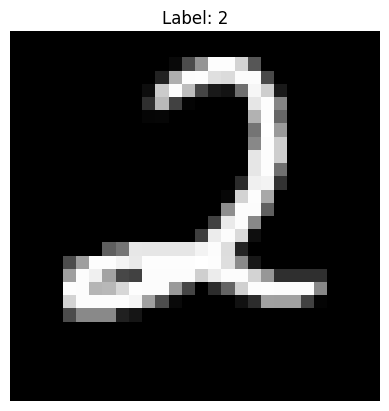

In [7]:
# choosing number of samples randomly
i = random.randint(0, len(X))
plt.imshow(X_images[i], cmap='gray')
plt.title(f"Label: {y[i]}")
plt.axis('off')
plt.show()

# 1-  SIMPLE ANN MODEL AND SVM AND APPLY THEM TO THE DATA independently

In [8]:
X_ann = X / 255.0
y_ann = to_categorical(y.astype(int), 10)

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=50)

ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_ann, y_train_ann, epochs=10, batch_size=128, validation_split=0.1)

ann_loss, ann_acc = ann_model.evaluate(X_test_ann, y_test_ann)
print(f"ANN Test Accuracy: {ann_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8274 - loss: 0.6352 - val_accuracy: 0.9489 - val_loss: 0.1809
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9562 - loss: 0.1523 - val_accuracy: 0.9643 - val_loss: 0.1324
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9697 - loss: 0.1029 - val_accuracy: 0.9723 - val_loss: 0.1096
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9781 - loss: 0.0750 - val_accuracy: 0.9730 - val_loss: 0.0984
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9723 - val_loss: 0.0969
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9855 - loss: 0.0483 - val_accuracy: 0.9741 - val_loss: 0.0912
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0370 - val_accuracy: 0.9752 - val_loss: 0.0933
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.

In [9]:
X_svm, _, y_svm, _ = train_test_split(X, y, train_size=7000, stratify=y, random_state=42) #To speed up svm because it is slow on large data

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm)
svm_acc = accuracy_score(y_test_svm, y_pred_svm)
print(f"SVM Test Accuracy: {svm_acc:.4f}")

SVM Test Accuracy: 0.8993
